In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import app.eda as eda
from sklearn.metrics import roc_curve
import scikitplot as skplt
import datetime
from sklearn.model_selection import GridSearchCV
from time import time

%matplotlib inline

In [3]:
pd.set_option("display.max_columns", 500)

In [35]:
#importing data
data = pd.read_json("train_data.json")

In [36]:
df = eda.clean_data(data)

In [37]:
df.head()

,label,body_length,channels,delivery_method,fb_published,gts,has_analytics,has_logo,listed,name_length,num_order,num_payouts,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,sold,currency_AUD,currency_CAD,currency_EUR,currency_GBP,currency_MXN,currency_NZD,currency_USD,payout_type_ACH,payout_type_CHECK,payout_type_undefined,public_domain_False,public_domain_True
0,True,3852,5,0.0,0,0.00,0,0,1,60,0,0,0.0,0.0,29.0,33,1,36,0,0,0,0,0,0,0,1,0,0,1,0,1
1,False,3499,0,1.0,0,868.02,0,1,0,27,23,1,0.0,12.0,28.0,28,0,149,25,0,0,0,0,0,0,1,0,1,0,1,0
10,False,4397,8,1.0,0,750.00,0,1,1,67,14,25,0.0,0.0,16.0,19,0,729,33,0,0,0,0,0,0,1,0,1,0,1,0
100,False,14294,5,1.0,0,539.00,0,0,1,61,11,19,0.0,0.0,22.0,22,1,836,17,0,0,0,0,0,0,1,0,1,0,1,0
1000,False,3307,6,0.0,0,518.62,0,1,1,20,13,0,61.0,10.0,6.0,6,0,997,23,0,0,0,0,0,0,1,0,1,0,1,0


In [38]:
y = df.pop("label").values
X = df.values

In [39]:
X.shape

(13150, 30)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Gradient boosting classifier

In [41]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

In [42]:
#confusion matrix
precision, recall, accuracy, matrix = eda.metrics(y_test, gbc_pred)

In [43]:
matrix

array([[ 237,   17],
       [  35, 2999]])

In [44]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))
print("Accuracy: {}".format(round(accuracy*100,2)))

Recall: 0.87
Precision: 0.93
Accuracy: 98.42


In [45]:
#predicted probabilities
scores = gbc.predict_proba(X_test)

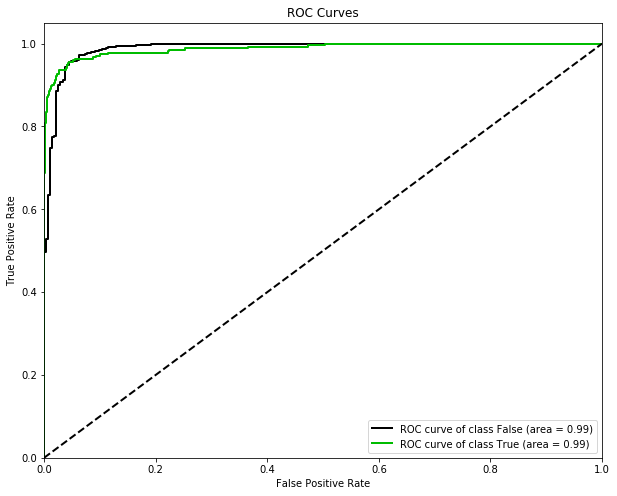

In [46]:
_=skplt.metrics.plot_roc(y_test, scores, plot_micro=False, plot_macro=False, figsize=(10,8))

In [47]:
# use a full grid over all parameters
param_grid = {
    "learning_rate": [0.3],
    "max_depth":[3,5],
    "max_features":["log2"],
    "criterion": ["friedman_mse"]
    }

# run grid search
start = time()
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, n_jobs=-1)

grid_search.fit(X_train, y_train)
end = time()

In [48]:
print("Run time: {}s".format(round(end - start, 2)))

Run time: 3.3s


In [49]:
gbc_best = grid_search.best_estimator_
gbc_best

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=5,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [50]:
gbc_pred1 = gbc_best.predict(X_test)

In [51]:
#confusion matrix
precision, recall, accuracy, matrix = eda.metrics(y_test, gbc_pred1)

In [52]:
matrix

array([[ 236,   13],
       [  36, 3003]])

In [53]:
print("Recall: {}".format(round(recall,2)))
print("Precision: {}".format(round(precision,2)))
print("Accuracy: {}".format(round(accuracy*100,2)))

Recall: 0.87
Precision: 0.95
Accuracy: 98.51


In [54]:
#predicted probabilities
scores = gbc_best.predict_proba(X_test)

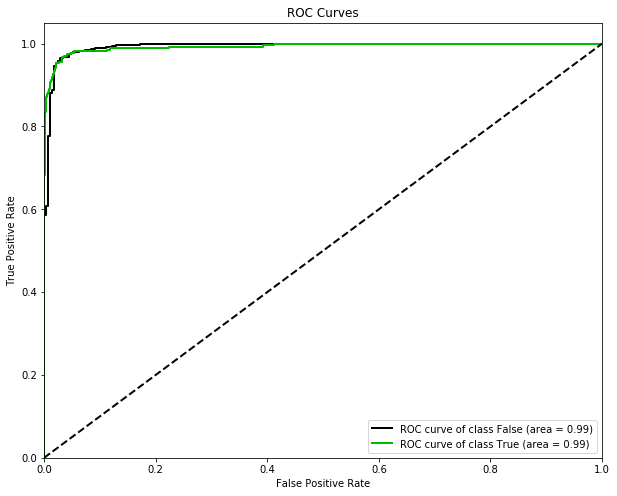

In [55]:
_=skplt.metrics.plot_roc(y_test, scores, plot_micro=False, plot_macro=False, figsize=(10,8))